_Lambda School Data Science, Unit 2_
 
# Regression 2 Sprint Challenge: Predict drugstore sales 🏥

For your Sprint Challenge, you'll use real-world sales data from a German drugstore chain, from Jan 2, 2013 — July 31, 2015.

You are given three dataframes:

- `train`: historical sales data for 100 stores
- `test`: historical sales data for 100 different stores
- `store`: supplemental information about the stores


The train and test set do _not_ have different date ranges. But they _do_ have different store ids. Your task is _not_ to forecast future sales from past sales. **Your task is to predict sales at unknown stores, from sales at known stores.**

In [75]:
import pandas as pd
train = pd.read_csv('https://drive.google.com/uc?export=download&id=1E9rgiGf1f_WL2S4-V6gD7ZhB8r8Yb_lE')
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1vkaVptn4TTYC9-YPZvbvmfDNHVR8aUml')
store = pd.read_csv('https://drive.google.com/uc?export=download&id=1rZD-V1mWydeytptQfr-NL7dBqre6lZMo')
assert train.shape == (78400, 7)
assert test.shape == (78400, 7)
assert store.shape == (200, 10)

The dataframes have a variety of columns:

- **Store** - a unique Id for each store
- **DayOfWeek** - integer, 1-6
- **Date** - the date, from Jan 2, 2013 — July 31, 2015.
- **Sales** - the units of inventory sold on a given date (this is the target you are predicting)
- **Customers** - the number of customers on a given date
- **Promo** - indicates whether a store is running a promo on that day
- **SchoolHoliday** - indicates the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

This Sprint Challenge has three parts. To demonstrate mastery on each part, do all the required instructions. To earn a score of "3" for the part, also do the stretch goals.

## 1. Wrangle relational data, Log-transform the target
- Merge the `store` dataframe with the `train` and `test` dataframes. 
- Arrange the X matrix and y vector for the train and test sets.
- Log-transform the target for the train and test set.
- Plot the target's distribution for the train set, before and after the transformation.

#### Stretch goals
- Engineer 3+ more features.

In [43]:
# Doing some data exploration

print(train.shape)
train.head()

(78400, 7)


,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday
0,4,5,2015-07-31,13995,1498,1,1
1,8,5,2015-07-31,8492,833,1,1
2,11,5,2015-07-31,10457,1236,1,1
3,12,5,2015-07-31,8959,962,1,1
4,34,5,2015-07-31,11144,1162,1,1


In [44]:
print(test.shape)
test.head()

(78400, 7)


,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday
0,10,5,2015-07-31,7185,681,1,1
1,15,5,2015-07-31,9191,766,1,1
2,31,5,2015-07-31,7248,645,1,1
3,47,5,2015-07-31,9379,1021,1,1
4,53,5,2015-07-31,7540,690,1,1


In [45]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Promo            0
SchoolHoliday    0
dtype: int64

In [8]:
test.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Promo            0
SchoolHoliday    0
dtype: int64

In [9]:
print(store.shape)
store.head()

(200, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
1,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
2,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
3,11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
4,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [11]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            1
CompetitionOpenSinceMonth     37
CompetitionOpenSinceYear      37
Promo2                         0
Promo2SinceWeek              164
Promo2SinceYear              164
PromoInterval                164
dtype: int64

In [76]:
# Merging train and test with store
trainstore = train.merge(store, how='left')
print(trainstore.shape)
trainstore.head()

(78400, 16)


,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,4,5,2015-07-31,13995,1498,1,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
1,8,5,2015-07-31,8492,833,1,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
2,11,5,2015-07-31,10457,1236,1,1,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
3,12,5,2015-07-31,8959,962,1,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
4,34,5,2015-07-31,11144,1162,1,1,c,a,2240.0,9.0,2009.0,0,NaN,NaN,NaN


In [77]:
teststore = test.merge(store, how='left')
print(teststore.shape)
teststore.head()

(78400, 16)


,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,10,5,2015-07-31,7185,681,1,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
1,15,5,2015-07-31,9191,766,1,1,d,c,4110.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,31,5,2015-07-31,7248,645,1,1,d,c,9800.0,7.0,2012.0,0,NaN,NaN,NaN
3,47,5,2015-07-31,9379,1021,1,1,a,c,270.0,4.0,2013.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct"
4,53,5,2015-07-31,7540,690,1,1,a,c,30360.0,9.0,2013.0,0,NaN,NaN,NaN


In [16]:
teststore.isnull().sum()

Store                            0
DayOfWeek                        0
Date                             0
Sales                            0
Customers                        0
Promo                            0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance            784
CompetitionOpenSinceMonth    15680
CompetitionOpenSinceYear     15680
Promo2                           0
Promo2SinceWeek              65856
Promo2SinceYear              65856
PromoInterval                65856
dtype: int64

In [17]:
trainstore.isnull().sum()

Store                            0
DayOfWeek                        0
Date                             0
Sales                            0
Customers                        0
Promo                            0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth    13328
CompetitionOpenSinceYear     13328
Promo2                           0
Promo2SinceWeek              62720
Promo2SinceYear              62720
PromoInterval                62720
dtype: int64

In [18]:
# Promo, competition distance is right-skewed a bit

trainstore.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000,65072.00000,65072.000000,78400.000000,15680.000000,15680.000000
mean,544.690000,3.506378,6988.430778,826.109847,0.450255,0.195268,4731.200000,7.13253,2010.963855,0.200000,24.450000,2011.600000
std,325.893217,1.710560,2824.069622,316.205067,0.497522,0.396409,8911.590516,3.22930,2.451700,0.400003,13.596297,0.969567
min,4.000000,1.000000,1712.000000,206.000000,0.000000,0.000000,30.000000,1.00000,2006.000000,0.000000,1.000000,2010.000000
25%,259.250000,2.000000,5005.000000,599.000000,0.000000,0.000000,700.000000,4.00000,2009.000000,0.000000,14.000000,2011.000000
50%,550.000000,3.000000,6370.000000,757.000000,0.000000,0.000000,1945.000000,9.00000,2011.000000,0.000000,22.000000,2012.000000
75%,826.500000,5.000000,8303.000000,993.000000,1.000000,0.000000,3797.500000,9.00000,2013.000000,0.000000,35.000000,2012.000000
max,1113.000000,6.000000,27265.000000,3360.000000,1.000000,1.000000,48330.000000,12.00000,2015.000000,1.000000,48.000000,2013.000000


In [51]:
trainstore.describe(exclude='number')

,Date,StoreType,Assortment,PromoInterval
count,78400,78400,78400,15680
unique,784,3,2,3
top,2014-07-25 00:00:00,a,c,"Jan,Apr,Jul,Oct"
freq,100,53312,44688,7056
first,2013-01-02 00:00:00,NaN,NaN,NaN
last,2015-07-31 00:00:00,NaN,NaN,NaN


In [71]:
# Changing to datetime
import pandas as pd
import numpy as np

# Doing this messed up by XBGRegression
# Got ValueError: DataFrame.dtypes for data must be int, float or bool.Did not expect the data types in fields Date
# trainstore['Date'] = pd.to_datetime(trainstore['Date'], infer_datetime_format=True)
# teststore['Date'] = pd.to_datetime(trainstore['Date'], infer_datetime_format=True)

In [78]:
# Splitting into validation set
# Splitting stratified for Goal in #2

from sklearn.model_selection import train_test_split

train, val = train_test_split(trainstore, random_state = 42, 
                              stratify=trainstore[['Date', 'StoreType']])

In [79]:
train.shape, val.shape

((58800, 16), (19600, 16))

In [61]:
# set(train) & set(val)

In [111]:
# Setting up X matrix and y vector

target = 'Sales'
# features = ['DayOfWeek', 'Date', 'Customers', 'Promo']
X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
X_test = teststore.drop(columns='Sales')
y_train = train[target]
y_val = val[target]
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

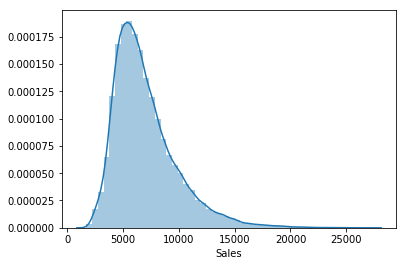

In [63]:
# Plotting target with and without log
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

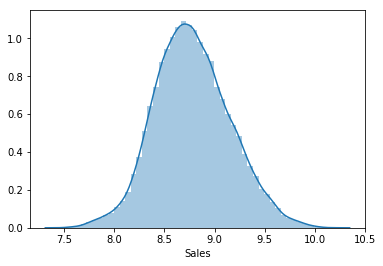

In [64]:
sns.distplot(y_train_log);

## 2. Fit and validate your model
- **Use Gradient Boosting** or any type of regression model.
- **Beat the baseline:** The estimated baseline Root Mean Squared Logarithmic Error is 0.90, if we guessed the mean sales for every prediction. Remember that RMSE with the log-transformed target is equivalent to RMSLE with the original target. Try to get your error below 0.20.
- **To validate your model, choose any one of these options:**
  - Split the train dataframe into train and validation sets. Put all dates for a given store into the same set. Use xgboost `early_stopping_rounds` with the validation set. 
  - Or, use scikit-learn `cross_val_score`. Put all dates for a given store into the same fold.
  - Or, use scikit-learn `RandomizedSearchCV` for hyperparameter optimization. Put all dates for a given store into the same fold.
- **Get the Validation Error** (multiple times if you try multiple iterations) **and Test Error** (one time, at the end).
  
#### Stretch goal
- Optimize 3+ hyperparameters by searching 10+ "candidates" (possible combinations of hyperparameters). 

In [84]:
import category_encoders as ce
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Error on the model.fit line with this
# encoder = ce.OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train)
# X_val_encoded = encoder.transform(X_val)

# model = XGBRegressor(n_estimators=700, n_jobs=-1, random_state=24)
# model.fit(X_train_encoded, y_train_log)
# y_pred_log = model.predict(X_val_encoded)
# print('RMSE Score', rmse(y_val_log, y_pred_log))

pipeline = make_pipeline(ce.OrdinalEncoder(),
                        XGBRegressor(n_estimators=1000, n_jobs=-1, random_state=24))
pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
print('RMSE for XGBR', rmse(y_val_log, y_pred_log))

RMSE for XGBR 0.05751556924720625


In [86]:
# Got RMSE <0.20, doing it again with early stopping rounds

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
eval_set = [(X_train_encoded, y_train_log),
           (X_val_encoded, y_val_log)]
model = XGBRegressor(n_estimators=2000, n_jobs=-1)
model.fit(X_train_encoded, y_train_log,
         eval_set=eval_set, eval_metric='rmse', early_stopping_rounds=50)

[0]	validation_0-rmse:7.45873	validation_1-rmse:7.4626
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:6.71344	validation_1-rmse:6.71661
[2]	validation_0-rmse:6.0427	validation_1-rmse:6.04519
[3]	validation_0-rmse:5.43906	validation_1-rmse:5.44095
[4]	validation_0-rmse:4.89581	validation_1-rmse:4.89733
[5]	validation_0-rmse:4.40692	validation_1-rmse:4.40799
[6]	validation_0-rmse:3.96696	validation_1-rmse:3.9677
[7]	validation_0-rmse:3.57105	validation_1-rmse:3.5715
[8]	validation_0-rmse:3.21476	validation_1-rmse:3.21492
[9]	validation_0-rmse:2.89416	validation_1-rmse:2.89404
[10]	validation_0-rmse:2.60568	validation_1-rmse:2.60527
[11]	validation_0-rmse:2.34612	validation_1-rmse:2.34564
[12]	validation_0-rmse:2.11258	validation_1-rmse:2.112
[13]	validation_0-rmse:1.90248	validation_1-rmse:1.90169
[14]	validation_0-rmse:1.71348	validation_1-rmse:1.71252
[1

[137]	validation_0-rmse:0.08082	validation_1-rmse:0.081305
[138]	validation_0-rmse:0.080717	validation_1-rmse:0.081206
[139]	validation_0-rmse:0.080638	validation_1-rmse:0.081133
[140]	validation_0-rmse:0.080458	validation_1-rmse:0.080947
[141]	validation_0-rmse:0.080175	validation_1-rmse:0.080666
[142]	validation_0-rmse:0.079974	validation_1-rmse:0.080454
[143]	validation_0-rmse:0.079846	validation_1-rmse:0.080331
[144]	validation_0-rmse:0.079763	validation_1-rmse:0.080246
[145]	validation_0-rmse:0.079672	validation_1-rmse:0.080129
[146]	validation_0-rmse:0.079589	validation_1-rmse:0.080044
[147]	validation_0-rmse:0.079542	validation_1-rmse:0.08
[148]	validation_0-rmse:0.079408	validation_1-rmse:0.079875
[149]	validation_0-rmse:0.079326	validation_1-rmse:0.079785
[150]	validation_0-rmse:0.079195	validation_1-rmse:0.079656
[151]	validation_0-rmse:0.079005	validation_1-rmse:0.079471
[152]	validation_0-rmse:0.078962	validation_1-rmse:0.079435
[153]	validation_0-rmse:0.078833	validation_1

[275]	validation_0-rmse:0.069371	validation_1-rmse:0.06981
[276]	validation_0-rmse:0.069313	validation_1-rmse:0.069759
[277]	validation_0-rmse:0.069221	validation_1-rmse:0.069655
[278]	validation_0-rmse:0.06918	validation_1-rmse:0.069618
[279]	validation_0-rmse:0.069131	validation_1-rmse:0.069551
[280]	validation_0-rmse:0.069083	validation_1-rmse:0.069504
[281]	validation_0-rmse:0.069007	validation_1-rmse:0.069417
[282]	validation_0-rmse:0.068921	validation_1-rmse:0.069334
[283]	validation_0-rmse:0.06889	validation_1-rmse:0.0693
[284]	validation_0-rmse:0.068855	validation_1-rmse:0.069266
[285]	validation_0-rmse:0.068801	validation_1-rmse:0.069211
[286]	validation_0-rmse:0.068768	validation_1-rmse:0.069175
[287]	validation_0-rmse:0.068723	validation_1-rmse:0.069126
[288]	validation_0-rmse:0.068688	validation_1-rmse:0.069092
[289]	validation_0-rmse:0.068668	validation_1-rmse:0.069078
[290]	validation_0-rmse:0.068624	validation_1-rmse:0.069019
[291]	validation_0-rmse:0.068593	validation_1

[413]	validation_0-rmse:0.064925	validation_1-rmse:0.065471
[414]	validation_0-rmse:0.064885	validation_1-rmse:0.06543
[415]	validation_0-rmse:0.06487	validation_1-rmse:0.065418
[416]	validation_0-rmse:0.064839	validation_1-rmse:0.065384
[417]	validation_0-rmse:0.064832	validation_1-rmse:0.06538
[418]	validation_0-rmse:0.064799	validation_1-rmse:0.065353
[419]	validation_0-rmse:0.064767	validation_1-rmse:0.065321
[420]	validation_0-rmse:0.064758	validation_1-rmse:0.065313
[421]	validation_0-rmse:0.064741	validation_1-rmse:0.065298
[422]	validation_0-rmse:0.064723	validation_1-rmse:0.06528
[423]	validation_0-rmse:0.064695	validation_1-rmse:0.065257
[424]	validation_0-rmse:0.064687	validation_1-rmse:0.065251
[425]	validation_0-rmse:0.064664	validation_1-rmse:0.065234
[426]	validation_0-rmse:0.064643	validation_1-rmse:0.065213
[427]	validation_0-rmse:0.064625	validation_1-rmse:0.065199
[428]	validation_0-rmse:0.064596	validation_1-rmse:0.065167
[429]	validation_0-rmse:0.064591	validation_

[551]	validation_0-rmse:0.061856	validation_1-rmse:0.062589
[552]	validation_0-rmse:0.061846	validation_1-rmse:0.062583
[553]	validation_0-rmse:0.061829	validation_1-rmse:0.062566
[554]	validation_0-rmse:0.06181	validation_1-rmse:0.062547
[555]	validation_0-rmse:0.061797	validation_1-rmse:0.062532
[556]	validation_0-rmse:0.061775	validation_1-rmse:0.062505
[557]	validation_0-rmse:0.061767	validation_1-rmse:0.062498
[558]	validation_0-rmse:0.061764	validation_1-rmse:0.062495
[559]	validation_0-rmse:0.061752	validation_1-rmse:0.062482
[560]	validation_0-rmse:0.061728	validation_1-rmse:0.062464
[561]	validation_0-rmse:0.061696	validation_1-rmse:0.062435
[562]	validation_0-rmse:0.061655	validation_1-rmse:0.062389
[563]	validation_0-rmse:0.061618	validation_1-rmse:0.062357
[564]	validation_0-rmse:0.061604	validation_1-rmse:0.062345
[565]	validation_0-rmse:0.061588	validation_1-rmse:0.062331
[566]	validation_0-rmse:0.06157	validation_1-rmse:0.062313
[567]	validation_0-rmse:0.061552	validatio

[688]	validation_0-rmse:0.059479	validation_1-rmse:0.060414
[689]	validation_0-rmse:0.059447	validation_1-rmse:0.06038
[690]	validation_0-rmse:0.059426	validation_1-rmse:0.060357
[691]	validation_0-rmse:0.059405	validation_1-rmse:0.060338
[692]	validation_0-rmse:0.059395	validation_1-rmse:0.060326
[693]	validation_0-rmse:0.059388	validation_1-rmse:0.060321
[694]	validation_0-rmse:0.059372	validation_1-rmse:0.060306
[695]	validation_0-rmse:0.059355	validation_1-rmse:0.060293
[696]	validation_0-rmse:0.059346	validation_1-rmse:0.060284
[697]	validation_0-rmse:0.059331	validation_1-rmse:0.060269
[698]	validation_0-rmse:0.059326	validation_1-rmse:0.060268
[699]	validation_0-rmse:0.059311	validation_1-rmse:0.060256
[700]	validation_0-rmse:0.059305	validation_1-rmse:0.060252
[701]	validation_0-rmse:0.059293	validation_1-rmse:0.060237
[702]	validation_0-rmse:0.059277	validation_1-rmse:0.060221
[703]	validation_0-rmse:0.059271	validation_1-rmse:0.060218
[704]	validation_0-rmse:0.059259	validati

[825]	validation_0-rmse:0.057843	validation_1-rmse:0.058954
[826]	validation_0-rmse:0.057836	validation_1-rmse:0.058949
[827]	validation_0-rmse:0.057833	validation_1-rmse:0.058946
[828]	validation_0-rmse:0.057826	validation_1-rmse:0.058941
[829]	validation_0-rmse:0.057807	validation_1-rmse:0.058921
[830]	validation_0-rmse:0.057785	validation_1-rmse:0.058901
[831]	validation_0-rmse:0.057775	validation_1-rmse:0.05889
[832]	validation_0-rmse:0.057762	validation_1-rmse:0.058876
[833]	validation_0-rmse:0.057751	validation_1-rmse:0.058866
[834]	validation_0-rmse:0.057749	validation_1-rmse:0.058864
[835]	validation_0-rmse:0.057731	validation_1-rmse:0.058847
[836]	validation_0-rmse:0.057725	validation_1-rmse:0.058844
[837]	validation_0-rmse:0.057717	validation_1-rmse:0.058836
[838]	validation_0-rmse:0.057705	validation_1-rmse:0.058828
[839]	validation_0-rmse:0.0577	validation_1-rmse:0.058823
[840]	validation_0-rmse:0.05769	validation_1-rmse:0.058814
[841]	validation_0-rmse:0.057669	validation_

[963]	validation_0-rmse:0.056469	validation_1-rmse:0.057751
[964]	validation_0-rmse:0.056455	validation_1-rmse:0.057737
[965]	validation_0-rmse:0.056442	validation_1-rmse:0.057724
[966]	validation_0-rmse:0.056432	validation_1-rmse:0.057717
[967]	validation_0-rmse:0.056423	validation_1-rmse:0.057709
[968]	validation_0-rmse:0.056415	validation_1-rmse:0.057701
[969]	validation_0-rmse:0.056405	validation_1-rmse:0.057692
[970]	validation_0-rmse:0.056402	validation_1-rmse:0.057689
[971]	validation_0-rmse:0.056391	validation_1-rmse:0.057677
[972]	validation_0-rmse:0.056379	validation_1-rmse:0.05767
[973]	validation_0-rmse:0.056366	validation_1-rmse:0.057659
[974]	validation_0-rmse:0.056361	validation_1-rmse:0.057655
[975]	validation_0-rmse:0.056355	validation_1-rmse:0.057654
[976]	validation_0-rmse:0.056353	validation_1-rmse:0.057655
[977]	validation_0-rmse:0.056343	validation_1-rmse:0.057644
[978]	validation_0-rmse:0.056339	validation_1-rmse:0.057641
[979]	validation_0-rmse:0.056323	validati

[1099]	validation_0-rmse:0.055415	validation_1-rmse:0.056823
[1100]	validation_0-rmse:0.05541	validation_1-rmse:0.056821
[1101]	validation_0-rmse:0.055405	validation_1-rmse:0.056816
[1102]	validation_0-rmse:0.055398	validation_1-rmse:0.056812
[1103]	validation_0-rmse:0.055393	validation_1-rmse:0.056811
[1104]	validation_0-rmse:0.05539	validation_1-rmse:0.056809
[1105]	validation_0-rmse:0.055384	validation_1-rmse:0.056803
[1106]	validation_0-rmse:0.055376	validation_1-rmse:0.056799
[1107]	validation_0-rmse:0.055375	validation_1-rmse:0.056796
[1108]	validation_0-rmse:0.05536	validation_1-rmse:0.056782
[1109]	validation_0-rmse:0.055345	validation_1-rmse:0.056768
[1110]	validation_0-rmse:0.055338	validation_1-rmse:0.056764
[1111]	validation_0-rmse:0.055335	validation_1-rmse:0.056762
[1112]	validation_0-rmse:0.055331	validation_1-rmse:0.056758
[1113]	validation_0-rmse:0.055308	validation_1-rmse:0.056741
[1114]	validation_0-rmse:0.055295	validation_1-rmse:0.056726
[1115]	validation_0-rmse:0.

[1234]	validation_0-rmse:0.054562	validation_1-rmse:0.056148
[1235]	validation_0-rmse:0.05456	validation_1-rmse:0.056147
[1236]	validation_0-rmse:0.054553	validation_1-rmse:0.056138
[1237]	validation_0-rmse:0.054545	validation_1-rmse:0.056133
[1238]	validation_0-rmse:0.054543	validation_1-rmse:0.056131
[1239]	validation_0-rmse:0.054536	validation_1-rmse:0.056128
[1240]	validation_0-rmse:0.054533	validation_1-rmse:0.056125
[1241]	validation_0-rmse:0.054527	validation_1-rmse:0.056122
[1242]	validation_0-rmse:0.05452	validation_1-rmse:0.056114
[1243]	validation_0-rmse:0.054516	validation_1-rmse:0.056111
[1244]	validation_0-rmse:0.054505	validation_1-rmse:0.056101
[1245]	validation_0-rmse:0.054499	validation_1-rmse:0.056094
[1246]	validation_0-rmse:0.054497	validation_1-rmse:0.056092
[1247]	validation_0-rmse:0.054477	validation_1-rmse:0.056077
[1248]	validation_0-rmse:0.054469	validation_1-rmse:0.056069
[1249]	validation_0-rmse:0.054467	validation_1-rmse:0.056068
[1250]	validation_0-rmse:0

[1369]	validation_0-rmse:0.05363	validation_1-rmse:0.05534
[1370]	validation_0-rmse:0.053624	validation_1-rmse:0.055336
[1371]	validation_0-rmse:0.053614	validation_1-rmse:0.055327
[1372]	validation_0-rmse:0.053606	validation_1-rmse:0.055315
[1373]	validation_0-rmse:0.053605	validation_1-rmse:0.055315
[1374]	validation_0-rmse:0.053604	validation_1-rmse:0.055315
[1375]	validation_0-rmse:0.053602	validation_1-rmse:0.055315
[1376]	validation_0-rmse:0.053599	validation_1-rmse:0.055314
[1377]	validation_0-rmse:0.053586	validation_1-rmse:0.055303
[1378]	validation_0-rmse:0.053578	validation_1-rmse:0.055294
[1379]	validation_0-rmse:0.053561	validation_1-rmse:0.055276
[1380]	validation_0-rmse:0.053558	validation_1-rmse:0.055275
[1381]	validation_0-rmse:0.053542	validation_1-rmse:0.055258
[1382]	validation_0-rmse:0.053535	validation_1-rmse:0.05525
[1383]	validation_0-rmse:0.053524	validation_1-rmse:0.055244
[1384]	validation_0-rmse:0.05352	validation_1-rmse:0.055239
[1385]	validation_0-rmse:0.0

[1504]	validation_0-rmse:0.052796	validation_1-rmse:0.054605
[1505]	validation_0-rmse:0.052777	validation_1-rmse:0.05459
[1506]	validation_0-rmse:0.052772	validation_1-rmse:0.054584
[1507]	validation_0-rmse:0.052767	validation_1-rmse:0.05458
[1508]	validation_0-rmse:0.052762	validation_1-rmse:0.054578
[1509]	validation_0-rmse:0.052761	validation_1-rmse:0.054577
[1510]	validation_0-rmse:0.052754	validation_1-rmse:0.054571
[1511]	validation_0-rmse:0.05273	validation_1-rmse:0.054551
[1512]	validation_0-rmse:0.052727	validation_1-rmse:0.05455
[1513]	validation_0-rmse:0.052722	validation_1-rmse:0.054547
[1514]	validation_0-rmse:0.052722	validation_1-rmse:0.054547
[1515]	validation_0-rmse:0.052716	validation_1-rmse:0.05454
[1516]	validation_0-rmse:0.05271	validation_1-rmse:0.054533
[1517]	validation_0-rmse:0.052704	validation_1-rmse:0.054527
[1518]	validation_0-rmse:0.052699	validation_1-rmse:0.054523
[1519]	validation_0-rmse:0.052697	validation_1-rmse:0.054523
[1520]	validation_0-rmse:0.052

[1639]	validation_0-rmse:0.052128	validation_1-rmse:0.054047
[1640]	validation_0-rmse:0.052115	validation_1-rmse:0.054034
[1641]	validation_0-rmse:0.052114	validation_1-rmse:0.054034
[1642]	validation_0-rmse:0.052103	validation_1-rmse:0.05402
[1643]	validation_0-rmse:0.052101	validation_1-rmse:0.05402
[1644]	validation_0-rmse:0.052099	validation_1-rmse:0.054018
[1645]	validation_0-rmse:0.052094	validation_1-rmse:0.054014
[1646]	validation_0-rmse:0.05209	validation_1-rmse:0.054013
[1647]	validation_0-rmse:0.05209	validation_1-rmse:0.054013
[1648]	validation_0-rmse:0.052084	validation_1-rmse:0.054004
[1649]	validation_0-rmse:0.05208	validation_1-rmse:0.054002
[1650]	validation_0-rmse:0.052079	validation_1-rmse:0.054002
[1651]	validation_0-rmse:0.052078	validation_1-rmse:0.054001
[1652]	validation_0-rmse:0.052076	validation_1-rmse:0.054
[1653]	validation_0-rmse:0.052074	validation_1-rmse:0.054
[1654]	validation_0-rmse:0.052073	validation_1-rmse:0.054
[1655]	validation_0-rmse:0.05207	valid

[1775]	validation_0-rmse:0.051614	validation_1-rmse:0.053653
[1776]	validation_0-rmse:0.051611	validation_1-rmse:0.053653
[1777]	validation_0-rmse:0.051609	validation_1-rmse:0.053653
[1778]	validation_0-rmse:0.051605	validation_1-rmse:0.053649
[1779]	validation_0-rmse:0.051604	validation_1-rmse:0.053649
[1780]	validation_0-rmse:0.051602	validation_1-rmse:0.053649
[1781]	validation_0-rmse:0.051598	validation_1-rmse:0.053647
[1782]	validation_0-rmse:0.051597	validation_1-rmse:0.053647
[1783]	validation_0-rmse:0.051594	validation_1-rmse:0.053646
[1784]	validation_0-rmse:0.051593	validation_1-rmse:0.053646
[1785]	validation_0-rmse:0.051579	validation_1-rmse:0.053633
[1786]	validation_0-rmse:0.051567	validation_1-rmse:0.053623
[1787]	validation_0-rmse:0.051563	validation_1-rmse:0.053622
[1788]	validation_0-rmse:0.051553	validation_1-rmse:0.053615
[1789]	validation_0-rmse:0.051551	validation_1-rmse:0.053615
[1790]	validation_0-rmse:0.051548	validation_1-rmse:0.053613
[1791]	validation_0-rmse

[1910]	validation_0-rmse:0.051118	validation_1-rmse:0.053288
[1911]	validation_0-rmse:0.051113	validation_1-rmse:0.053285
[1912]	validation_0-rmse:0.051112	validation_1-rmse:0.053284
[1913]	validation_0-rmse:0.05111	validation_1-rmse:0.053283
[1914]	validation_0-rmse:0.051107	validation_1-rmse:0.053279
[1915]	validation_0-rmse:0.051104	validation_1-rmse:0.053278
[1916]	validation_0-rmse:0.0511	validation_1-rmse:0.053274
[1917]	validation_0-rmse:0.051095	validation_1-rmse:0.05327
[1918]	validation_0-rmse:0.05109	validation_1-rmse:0.053264
[1919]	validation_0-rmse:0.051088	validation_1-rmse:0.053264
[1920]	validation_0-rmse:0.051082	validation_1-rmse:0.053261
[1921]	validation_0-rmse:0.051079	validation_1-rmse:0.05326
[1922]	validation_0-rmse:0.051078	validation_1-rmse:0.053259
[1923]	validation_0-rmse:0.051074	validation_1-rmse:0.053256
[1924]	validation_0-rmse:0.051074	validation_1-rmse:0.053255
[1925]	validation_0-rmse:0.051071	validation_1-rmse:0.053253
[1926]	validation_0-rmse:0.051

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [114]:
# Running RMSLE on Test dataset
# Test Error of 0.17
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

X_test_encoded = encoder.transform(X_test)
y_true = teststore['Sales']
y_pred_log = pipeline.predict(X_test_encoded)
y_pred = np.expm1(y_pred_log)
# y_pred = y_pred_log(y_pred_log)
print('Test RMSLE', rmsle(y_pred, y_true))

Test RMSLE 0.17235767879899716


In [120]:
# Fitting Hyperparameters for Stretch

from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor

groups = train['Store']

pipeline = make_pipeline(ce.OrdinalEncoder(),
                        XGBRegressor(random_state=24))

# Picking parameter distribution ranges based on earlier ranges
param_distributions = {'xgbregressor__n_estimators': randint(500, 1000), 
                    'xgbregressor__max_depth': randint(5, 15)}

# 10 iterations to hit stretch goal
search = RandomizedSearchCV(pipeline,
                           param_distributions = param_distributions,
                           n_iter=10,
                           cv=2,
                           scoring='neg_mean_squared_error',
                           verbose=5,
                           return_train_score=True,
                           n_jobs=-1)
search.fit(X_train, y_train_log, groups=groups);

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  9.0min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.1min finished


In [121]:
print('best hyperparameters: ', search.best_params_)
print('cross validation RMSLE: ', np.sqrt(-search.best_score_))

best hyperparameters:  {'xgbregressor__max_depth': 6, 'xgbregressor__n_estimators': 928}
cross validation RMSLE:  0.052383100800854066


In [122]:
# Top 5 hyperparameter combinations

results_df = pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score')
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
7,70.627560,0.198393,4.313502,0.471052,6,928,"{'xgbregressor__max_depth': 6, 'xgbregressor__...",-0.002707,-0.002781,-0.002744,0.000037,1,-0.001174,-0.001207,-0.001190,1.683172e-05
0,59.737228,0.256860,5.889916,0.004427,8,717,"{'xgbregressor__max_depth': 8, 'xgbregressor__...",-0.002785,-0.002825,-0.002805,0.000020,2,-0.000564,-0.000589,-0.000577,1.218753e-05
2,84.845757,0.262260,8.514994,0.011670,8,844,"{'xgbregressor__max_depth': 8, 'xgbregressor__...",-0.002788,-0.002830,-0.002809,0.000021,3,-0.000458,-0.000468,-0.000463,4.905436e-06
1,76.615312,0.054911,8.235505,0.052698,8,903,"{'xgbregressor__max_depth': 8, 'xgbregressor__...",-0.002793,-0.002835,-0.002814,0.000021,4,-0.000411,-0.000422,-0.000417,5.308446e-06
6,110.187482,0.619347,14.697073,0.833993,9,919,"{'xgbregressor__max_depth': 9, 'xgbregressor__...",-0.002860,-0.002895,-0.002878,0.000017,5,-0.000202,-0.000200,-0.000201,6.469935e-07


## 3. Plot model interpretation visualizations
- Choose any one of these options:
  - Permutation Importances plot
  - Partial Dependency Plot, 1 feature isolation
  - Partial Dependency Plot, 2 feature interaction
  
#### Stretch goals
- Plot 2+ visualizations.
- Use permutation importances for feature selection. 

In [94]:
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot

# # This is throwing an error, so doing the other plots
# permuter = PermutationImportance(model, scoring='neg_mean_squared_error', 
#                                  cv='prefit', n_iter=2)

# permuter.fit(X_val_encoded, y_val_log)
# feature_names = X_val_encoded.columns.tolist()
# eli5.show_weights(permuter, top=None, feature_names=feature_names)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x11e46f860>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a2403b4a8>})

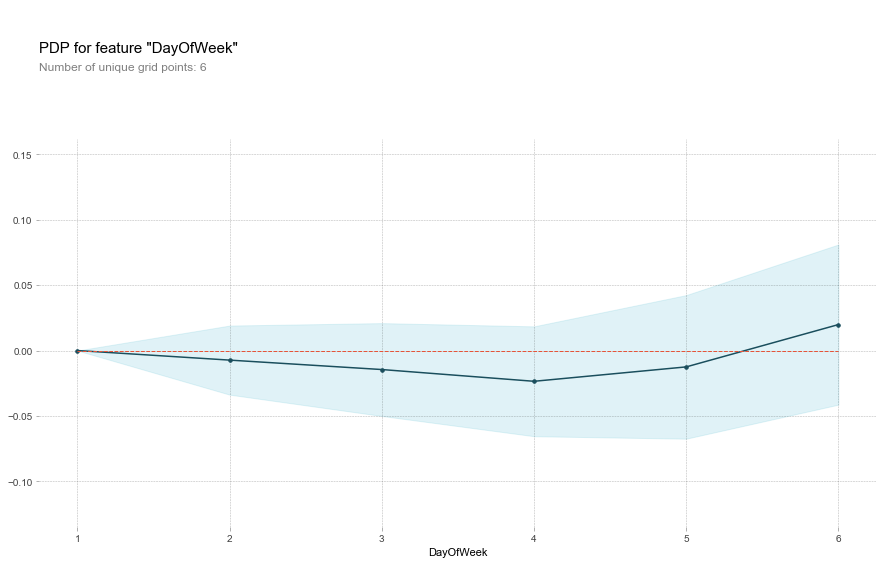

In [91]:
# PDP Plot, 1 Feature

feature = 'DayOfWeek'

isolated = pdp_isolate(model=model,
                      dataset=X_val_encoded,
                      model_features=X_val_encoded.columns,
                      feature=feature)
pdp_plot(isolated, feature_name=feature)

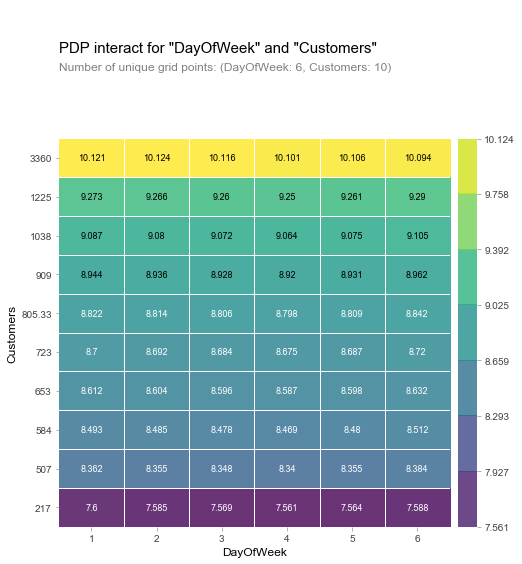

In [93]:
# PDP Plot, 2 features for Stretch

from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['DayOfWeek', 'Customers']

interaction = pdp_interact(model=model,
                          dataset=X_val_encoded,
                          model_features=X_val_encoded.columns,
                          features=features)
pdp_interact_plot(interaction, plot_type='grid', feature_names=features);